In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

import wrangle as w
import explore as e

In [2]:
# plotting defaults
plt.rc('figure', figsize=(20, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
records = w.get_health_data('Record')

In [4]:
records = w.clean_records_list(records)

In [5]:
records = w.records_list_time_zone_fun(records)

In [6]:
daily_info = w.get_daily_info(records)

In [7]:
daily_info['2022'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 342 entries, 2022-01-01 to 2022-12-08
Freq: D
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   steps           342 non-null    float64
 1   weight          342 non-null    float64
 2   resting_hr      342 non-null    float64
 3   exercise_time   342 non-null    float64
 4   calorie_intake  94 non-null     float64
dtypes: float64(5)
memory usage: 16.0 KB


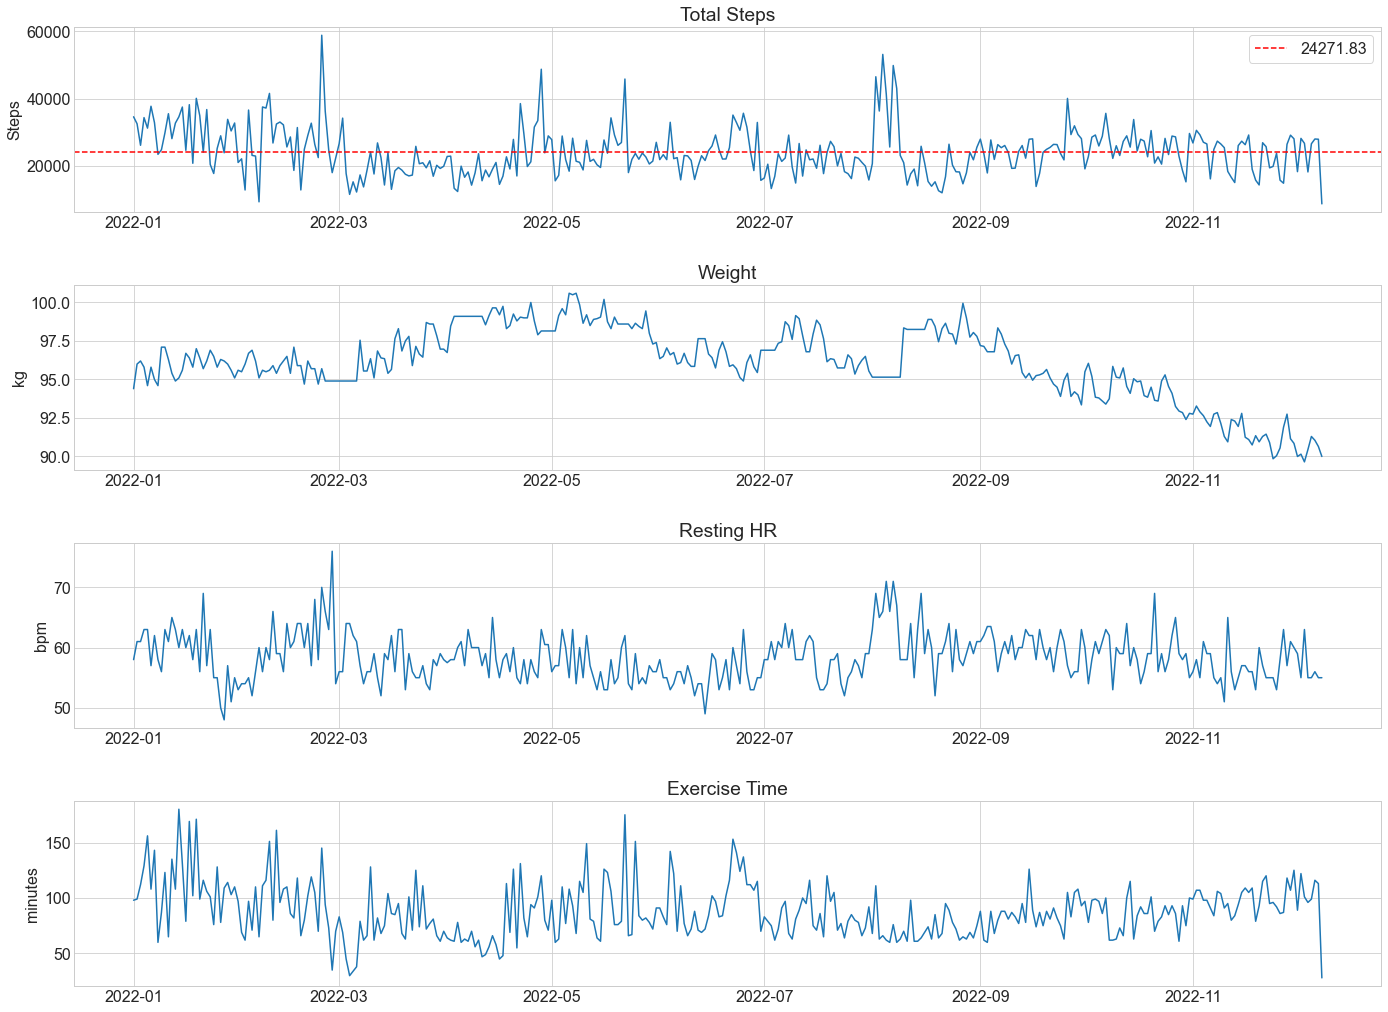

In [43]:
        fig, ax = plt.subplots(4,1, figsize=(20,15))
        fig.tight_layout(pad=3.0)

        ax[0].plot(daily_info['2022'].steps)
        ax[0].set_title('Total Steps')
        ax[0].set_ylabel('Steps')
        ax[0].axhline(daily_info['2022'].steps.mean(), color = 'r', linestyle = '--', label=f'{round(daily_info["2022"].steps.mean(),2)}')
        ax[0].legend(loc = 'upper right', frameon=True)
        
        ax[1].plot(daily_info['2022'].weight)
        ax[1].set_title('Weight')
        ax[1].set_ylabel('kg')

        ax[2].plot(daily_info['2022'].resting_hr)
        ax[2].set_title('Resting HR')
        ax[2].set_ylabel('bpm')

        ax[3].plot(daily_info['2022'].exercise_time)
        ax[3].set_title('Exercise Time')
        ax[3].set_ylabel('minutes')

        plt.show()

In [33]:
from importlib import reload

In [44]:
reload(e)

<module 'explore' from '/Users/fostermark/codeup-data-science/my_apple_health/explore.py'>

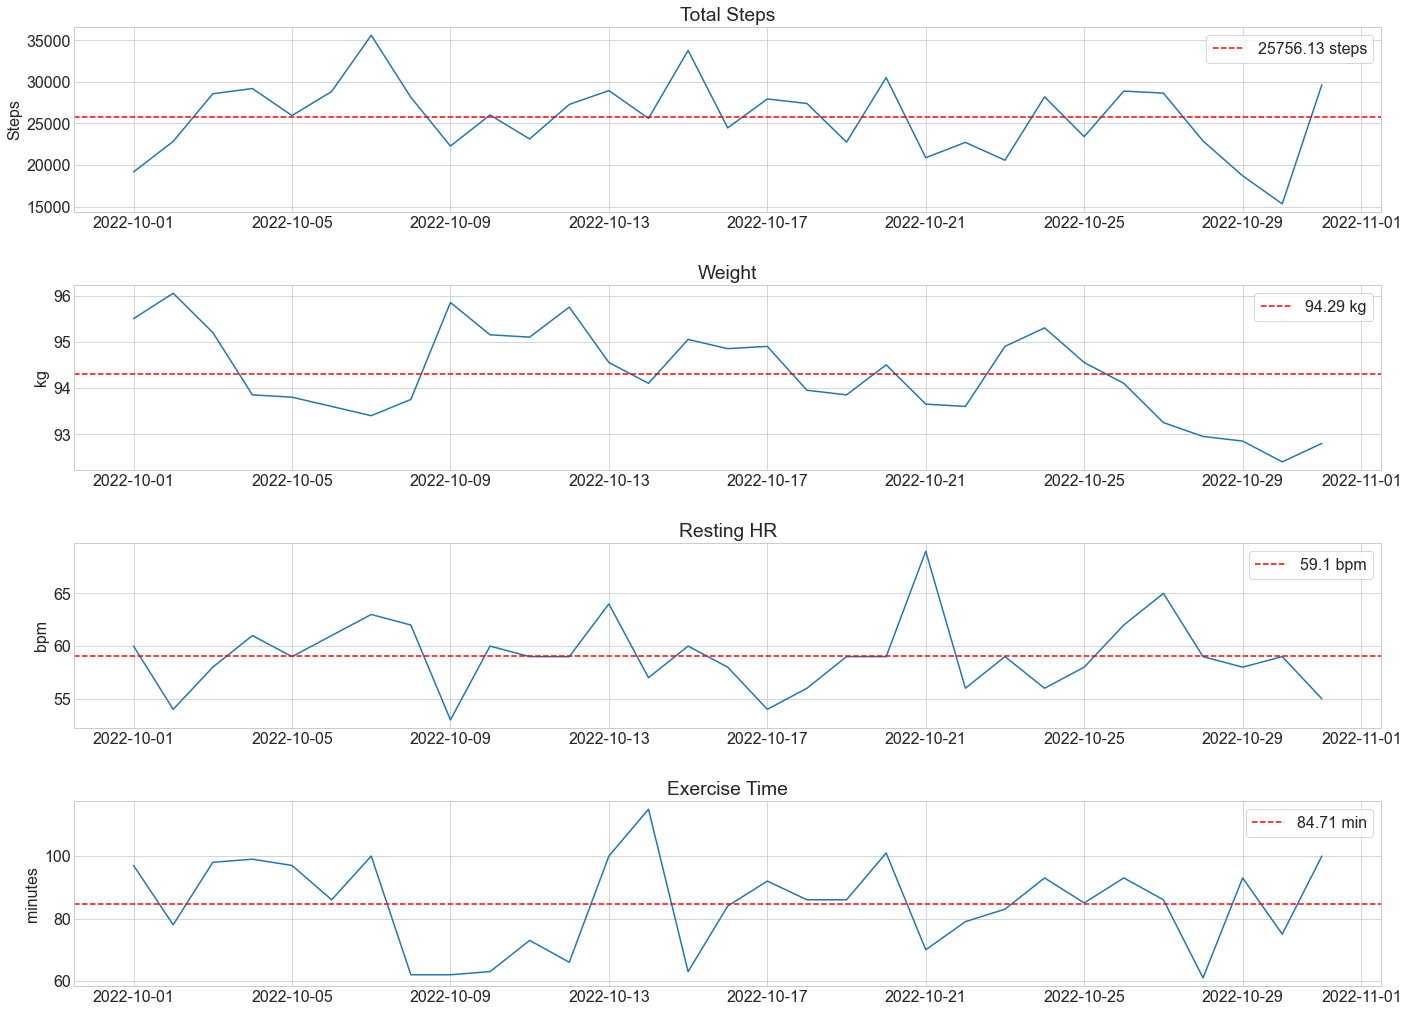

In [46]:
e.show_daily_viz(daily_info, year=2022, month=10)